In [0]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
cd 'drive/My Drive/Colab Notebooks/assignment/'

/content/drive/My Drive/Colab Notebooks/assignment


Importing the libraries

In [0]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

Importing the dataframe from csv file

In [0]:
df = pd.read_csv('sample_data_intw.csv')

# Preprocessing

Summary of dataset

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [0]:
df[df.notnull()].count()

Unnamed: 0              209593
label                   209593
msisdn                  209593
aon                     209593
daily_decr30            209593
daily_decr90            209593
rental30                209593
rental90                209593
last_rech_date_ma       209593
last_rech_date_da       209593
last_rech_amt_ma        209593
cnt_ma_rech30           209593
fr_ma_rech30            209593
sumamnt_ma_rech30       209593
medianamnt_ma_rech30    209593
medianmarechprebal30    209593
cnt_ma_rech90           209593
fr_ma_rech90            209593
sumamnt_ma_rech90       209593
medianamnt_ma_rech90    209593
medianmarechprebal90    209593
cnt_da_rech30           209593
fr_da_rech30            209593
cnt_da_rech90           209593
fr_da_rech90            209593
cnt_loans30             209593
amnt_loans30            209593
maxamnt_loans30         209593
medianamnt_loans30      209593
cnt_loans90             209593
amnt_loans90            209593
maxamnt_loans90         209593
medianam

Here we can see there are no 'nan' values in any row. Therefore, we do not need to preprocess rows with null values.

Checking dimensions of dataset

In [0]:
print((str(df.shape[0])+' rows x '+str(df.shape[1])+' columns' ))

209593 rows x 37 columns


In [0]:
df.describe(include = 'all')

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
count,209593.000000,209593.000000,209593,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593,209593
unique,NaN,NaN,186243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,82
top,NaN,NaN,47819I90840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UPW,2016-07-04
freq,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209593,3150
mean,104797.000000,0.875177,NaN,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,NaN,NaN
std,60504.431823,0.330519,NaN,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,NaN,NaN
min,1.000000,0.000000,NaN,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,52399.000000,1.000000,NaN,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,104797.000000,1.000000,NaN,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,NaN,NaN
75%,157195.000000,1.000000,NaN,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,NaN,NaN


Checking first five rows

In [0]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


Here, 'label' column is our dependant variable consisting of values 1 or 0.

And, we do not need columns 'Unnamed:0', 'msisdn', 'pcircle', 'pdate' as they are unrelated to the output.

So, specifying independent variables :

In [0]:
X = df.iloc[:,3:35].values
X

array([[2.72000000e+02, 3.05505000e+03, 3.06515000e+03, ...,
        0.00000000e+00, 2.90000000e+01, 2.90000000e+01],
       [7.12000000e+02, 1.21220000e+04, 1.21247500e+04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.35000000e+02, 1.39800000e+03, 1.39800000e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.01300000e+03, 1.18431117e+04, 1.19043500e+04, ...,
        0.00000000e+00, 4.00000000e+00, 3.83333333e+00],
       [1.73200000e+03, 1.24882283e+04, 1.25743700e+04, ...,
        0.00000000e+00, 0.00000000e+00, 1.05000000e+01],
       [1.58100000e+03, 4.48936200e+03, 4.53482000e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

Specifying dependent (output) variable 'y' :

In [0]:
y = df.iloc[:,1].values
y

array([0, 1, 1, ..., 1, 1, 1])

Splitting dataset into testing and training sets (25 to 75 ratio) :

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Feature Scaling :

In [0]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

Next step is to test different models and evaluate the results to see which model performs the best according to the given data.

# Machine Learning Algorithms

Importing some libararies for later steps.

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

## Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state=0, n_jobs=-1)

In [0]:
classifier_lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=0,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [0]:
y_pred = classifier_lr.predict(X_test)

Evaluating the results :

In [0]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[  185,  6402],
       [  115, 45697]])

In [0]:
print(classification_report(y_test, y_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.6167    0.0281    0.0537      6587
           1     0.8771    0.9975    0.9334     45812

    accuracy                         0.8756     52399
   macro avg     0.7469    0.5128    0.4936     52399
weighted avg     0.8444    0.8756    0.8229     52399



In [0]:
accuracy_lr = accuracy_score(y_pred, y_test)
print("Accuracy: {:.2f} %".format(accuracy_lr*100))

Accuracy: 87.56 %


## K Nearest Neighbours

In [0]:
from sklearn.neighbors import KNeighborsClassifier

Finding most optimal value of 'k'

In [0]:
error_rate = []
for i in range(1,20):  
    knn = KNeighborsClassifier(n_neighbors=i, metric ='minkowski',p=2)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
error_rate

[0.14874329662779823,
 0.1825798202255768,
 0.12200614515544189,
 0.1333040706883719,
 0.11494494169736064,
 0.12034580812610927,
 0.11158609897135441,
 0.1148113513616672,
 0.10996393060936277,
 0.11246397832019694,
 0.10939140059924808,
 0.1108608942918758,
 0.10870436458711044,
 0.11004026794404473,
 0.10807458157598428,
 0.1093532319319071,
 0.10832267791370065,
 0.10908605126052023,
 0.1078264852382679]

Text(0, 0.5, 'Error Rate')

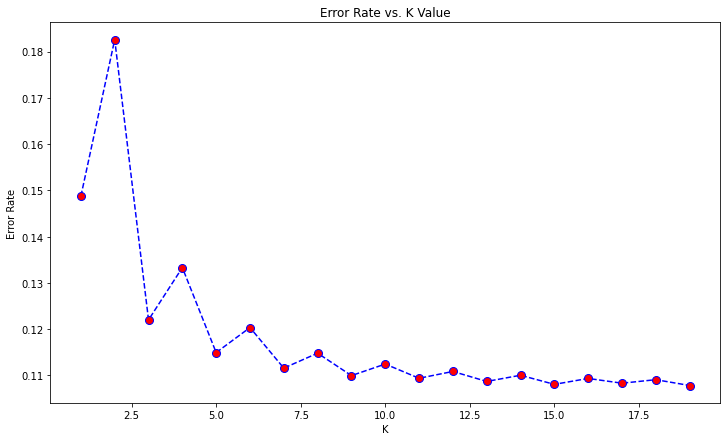

In [0]:
plt.figure(figsize=(12,7))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

We find the optimal value to be at 15 with error rate being very low.

In [0]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 15, metric ='minkowski',p=2, n_jobs=-1) #Using euclidean distance

In [0]:
classifier_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=15, p=2,
                     weights='uniform')

In [0]:
y_pred = classifier_knn.predict(X_test)

Evaluating the results :

In [0]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 2268,  4319],
       [ 1344, 44468]])

In [0]:
print(classification_report(y_test, y_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.6279    0.3443    0.4447      6587
           1     0.9115    0.9707    0.9401     45812

    accuracy                         0.8919     52399
   macro avg     0.7697    0.6575    0.6924     52399
weighted avg     0.8758    0.8919    0.8779     52399



In [0]:
accuracy_knn = accuracy_score(y_pred, y_test)
print("Accuracy: {:.2f} %".format(accuracy_knn*100))

Accuracy: 89.19 %


## Kernel Support Vector Machine

**NOTE : This model takes long time to train.**

In [0]:
from sklearn.svm import SVC
classifier_ksvm = SVC(kernel = 'rbf', random_state = 0)

In [0]:
classifier_ksvm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
y_pred = classifier_ksvm.predict(X_test)

Evaluating the results :

In [0]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[  202,  6385],
       [  107, 45705]])

In [0]:
print(classification_report(y_test, y_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.6537    0.0307    0.0586      6587
           1     0.8774    0.9977    0.9337     45812

    accuracy                         0.8761     52399
   macro avg     0.7656    0.5142    0.4961     52399
weighted avg     0.8493    0.8761    0.8237     52399



In [0]:
accuracy_ksvm = accuracy_score(y_pred, y_test)
print("Accuracy: {:.2f} %".format(accuracy_ksvm*100))

Accuracy: 87.61 %


## Random Forest Classifier

Since Random Forest Classifier always tends to outperform Decision Tree Classifier in terms of accuracy (and it reduces overfitting), I have not used Decision Tree.

In [0]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0, n_jobs=-1)

In [0]:
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
y_pred = classifier_rf.predict(X_test)

Evaluating the results :

In [0]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 2987,  3600],
       [  975, 44837]])

In [0]:
print(classification_report(y_test, y_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.7539    0.4535    0.5663      6587
           1     0.9257    0.9787    0.9515     45812

    accuracy                         0.9127     52399
   macro avg     0.8398    0.7161    0.7589     52399
weighted avg     0.9041    0.9127    0.9030     52399



In [0]:
accuracy_rf = accuracy_score(y_pred, y_test)
print("Accuracy: {:.2f} %".format(accuracy_rf*100))

Accuracy: 91.27 %


## Naive Bayes

In [0]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()

In [0]:
classifier_nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred = classifier_nb.predict(X_test)

Evaluating the results :

In [0]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 5766,   821],
       [21145, 24667]])

In [0]:
print(classification_report(y_test, y_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.2143    0.8754    0.3443      6587
           1     0.9678    0.5384    0.6919     45812

    accuracy                         0.5808     52399
   macro avg     0.5910    0.7069    0.5181     52399
weighted avg     0.8731    0.5808    0.6482     52399



In [0]:
accuracy_nb = accuracy_score(y_pred, y_test)
print("Accuracy: {:.2f} %".format(accuracy_nb*100))

Accuracy: 58.08 %


## XGBoost

In [0]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier()

In [0]:
classifier_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred = classifier_xgb.predict(X_test)

Evaluating the results :

In [0]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 2230,  4357],
       [  490, 45322]])

In [0]:
print(classification_report(y_test, y_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.8199    0.3385    0.4792      6587
           1     0.9123    0.9893    0.9492     45812

    accuracy                         0.9075     52399
   macro avg     0.8661    0.6639    0.7142     52399
weighted avg     0.9007    0.9075    0.8902     52399



In [0]:
accuracy_xgb = accuracy_score(y_pred, y_test)
print("Accuracy: {:.2f} %".format(accuracy_xgb*100))

Accuracy: 90.75 %


# Deep Learning (Artificial Neural Networks)

Using Keras with tensorflow backend.

NOTE : Model takes a long time with GridSearchCV to find the most optimal parameters and best accuracy when using small batch size.

And, due to larger graphics memory transfer overhead (to convert instructions from RAM to GPU than RAM to CPU) when using small batch sizes, model trains slower on GPU than on CPU.

Increasing batch size and then running on GPU is much faster but accuracy very slowly decreases with increasing batch size.

Model was trained using NVIDIA Tesla K80 GPU.

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


Adding **Dropout** reduces accuracy in this case, and therefore, is not used.

One extra hidden layer is used to improve the model.

In [0]:
def build_classifier(optimizer):
    #Initialising the ANN
    classifier = Sequential()
    #Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 32))
    #Adding the second hidden layer
    classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
    #Adding the output layer and using activation function 'sigmoid' since we only need two outputs 0 and 1 
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    #For binary outputs we use loss as 'binary_crossentropy'
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [0]:
classifier = KerasClassifier(build_fn = build_classifier)

Finding optimal parameters using **GridSearchCV** :

In [0]:
parameters = {'batch_size': [32,64,128],
              'epochs': [25,35,45],
              'optimizer': ['adam', 'rmsprop', 'nadam','sgd']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose = 1,
                           )
grid_search = grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/25
141474/141474 [==============================] - 5s 35us/step - loss: 0.3044 - accuracy: 0.8758
Epoch 2/25
141474/141474 [==============================] - 5s 34us/step - loss: 0.2899 - accuracy: 0.8792
Epoch 3/25
141474/141474 [==============================] - 5s 34us/step - loss: 0.2882 - accuracy: 0.8801
Epoch 4/25
141474/141474 [==============================] - 5s 35us/step - loss: 0.2847 - accuracy: 0.8815
Epoch 5/25
141474/141474 [==============================] - 5s 34us/step - loss: 0.2820 - accuracy: 0.8821
Epoch 6/25
141474/141474 [==============================] - 5s 35us/step - loss: 0.2811 - accuracy: 0.8825
Epoch 7/25
141474/141474 [==============================] - 5s 34us/step - loss: 0.2801 - accuracy: 0.8829
Epoch 8/25
141474/141474 [==============================] - 5s 34us/step - loss: 0.2797 - accuracy: 0.8829
Epoch 9/25
141474/141474 [==============================] - 5s 35us/step - loss: 0.2790 - accuracy: 0.8831
Epoch 10/25
141474/141474 [==========

Most optimal parameters to obtain best accuracy :

In [0]:
best_parameters = grid_search.best_params_
best_parameters



*   Increasing batch size will result in faster computation speed but with slightly diminishing accuracies.



Best accuracy according to optimal parameters :

In [0]:
best_accuracy = grid_search.best_score_
print('Accuracy : {:.2f} %'.format(best_accuracy*100))
accuracy_ann = best_accuracy

# Inference

Plotting the accuracies.

In [0]:
accuracy_ksvm = 0.8761
accuracy_nb = 0.5808
accuracy_ann = 0.8917

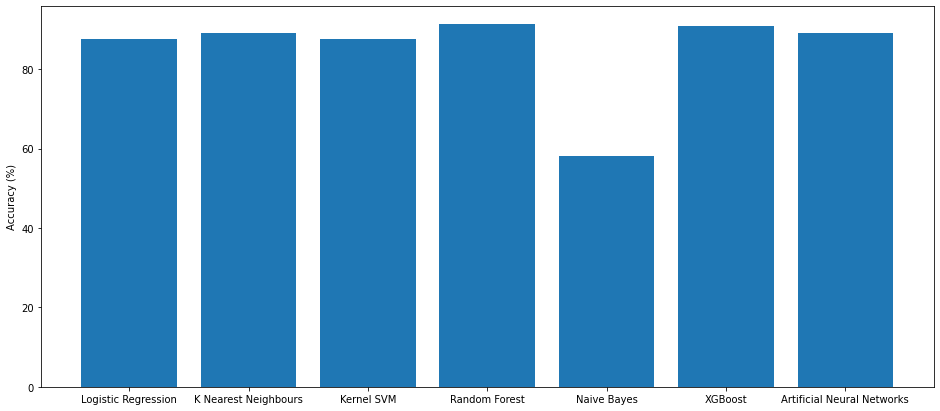

In [0]:
accuracies = {'Logistic Regression':accuracy_lr,
              'K Nearest Neighbours':accuracy_knn,
              'Kernel SVM':accuracy_ksvm,
              'Random Forest':accuracy_rf,
              'Naive Bayes':accuracy_nb,
              'XGBoost':accuracy_xgb,
              'Artificial Neural Networks':accuracy_ann}

for k in accuracies:
    accuracies[k] = accuracies[k]*100

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib

figure(figsize=(16, 7))
plt.ylabel('Accuracy (%)')
plt.bar(accuracies.keys(), accuracies.values())
plt.show()



*   We see that Random Forest Classifer and XGBoost (eXtreme Gradient Boosting) Classifier performs best when compared to other models.
*   Using Artificial Neural Networks even with very good parameters results in a slightly lower accuracy compared to machine learning models. This shows that more data is required for Deep Learning to outperform ML algorithms.
*   Naive Bayes does not give good accuracy for our data. Therefore, it should not be used for predictions.
*   Recall and F1 Score in Kernel Support Vector Machine and Logistic Regression is not good, therefore model should be avoided in this case.


# Improving the models

Next, I have tried to further improve two best ML models (Random Forest and XGBoost) using **K-Fold Cross Validation** and **GridSearchCV**.

## Random Forest Classifier

Using GridSearchCV to obtain optimal parameters (K-Fold Cross Validation is done automatically when using GridSearchCV) :

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf_classifier=RandomForestClassifier(random_state=0, n_jobs=-1)

In [0]:
parameters_rf = { 
    'n_estimators': [100,250,500],
    'max_features': ['auto'],
    'max_depth' : [8,9],
    'criterion' :['gini', 'entropy']
}

In [0]:
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=parameters_rf, cv= 15 )
grid_search_rf.fit(X_train, y_train)

Optimal parameters to obtain best accuracy :

In [0]:
best_parameters_rf = grid_search_rf.best_params_
best_parameters_rf

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

Best accuracy according to optimal parameters :

In [0]:
best_accuracy_rf = grid_search_rf.best_score_
print('Accuracy : {:.2f} %'.format(best_accuracy_rf*100))

Accuracy : 90.54 %


*   Changing the max_depth (n_estimators only slightly) does not seem to increase accuracy much and therefore old model is good enough to be used. 

## XGBoost

Since we have already selected optimal parameters, there is no need for GridSearchCV.

Applying K-Fold Cross Validation :

In [0]:
xgb_accuracies = cross_val_score(estimator = classifier_xgb, X = X_train, y = y_train, cv = KFold(n_splits=15, random_state=0), n_jobs=-1)
xgb_accuracies

array([0.90524809, 0.90734733, 0.90267176, 0.91145038, 0.91135496,
       0.9134542 , 0.90944656, 0.90333969, 0.90562977, 0.90667048,
       0.90752934, 0.90905621, 0.9100105 , 0.90485733, 0.9063842 ])

In [0]:
print('Accuracy (without K-Fold): {:.4f} %'.format(accuracy_xgb*100))
print("Mean Accuracy (with K-Fold): {:.4f} %".format(xgb_accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(xgb_accuracies.std()*100))

Accuracy (without K-Fold): 90.7498 %
Mean Accuracy (with K-Fold): 90.7630 %
Standard Deviation: 0.30 %


*   We can see that using K-Fold Cross Validation on XGBoost only very slightly increases the accuracy for few folds (groups), and therefore our model does not benefit too much from it here.
